Topic:        Challenge Set 8  
Subject:      Classification  Errors
Date:         10/16/2017  
Name:         Pradnya Nimkar

**Challenge 8**

#### Challenge 1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
column_names =['Class_Name',
'handicapped_infants',
'water-project-cost-sharing',
'adoption-of-the-budget-resolution',
'physician-fee-freeze',
'el-salvador-aid',
'religious-groups-schools',
'anti-satellite-test-ban',
'aid-to-nicaraguan-contras',
'mx-missile',
'immigration',
'synfuels-corporation-cutback',
'education-spending',
'superfund-right-to-sue',
'crime',
'duty-free-exports',
'export-administration-act-south-africa']

In [12]:
house_votes = pd.read_table('/Users/pradnyanimkar/ds/metis/metisgh/sf17_ds8_mycopy/Challenge8/house-votes-84_download.data',sep = ',',header = None, names = column_names)

In [13]:
house_votes2 = house_votes.replace(['y','n', '?'],[1,0, None])

In [14]:
house_votes3 = house_votes2.fillna(house_votes2.mean())
house_votes3.head()

,Class_Name,handicapped_infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000,0.362,1.000,1.000,1.000,0.000,1.000
1,republican,0.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.813
2,democrat,0.442,1.000,1.000,0.417,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000
3,democrat,0.000,1.000,1.000,0.000,0.505,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000
4,democrat,1.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.423,1.000,1.000,1.000,1.000


In [15]:
# Generate a confusion matrix plot: 

def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Could be a typical function for classifying:

def train_score(classifier,x,y):
    xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(x, y, test_size=0.3, random_state=4444)
    ytrain=np.ravel(ytrain)
    clf = classifier.fit(xtrain, ytrain)
    # accuracy for test & train:
    train_acc=clf.score(xtrain, ytrain)
    test_acc=clf.score(xtest,ytest)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = ytest
    y_pred = clf.predict(xtest)


    conf = confusion_matrix(y_true, y_pred)
    print(conf)
    precision = (conf[0, 0] / (conf[0, 0] + conf[1, 0]))
    recall = (conf[0, 0] / (conf[0, 0] + conf[0, 1]))
    print ('\n')
    print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    print("f1: %0.2f"% (2*((recall * precision)/ (recall + precision))))
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)

In [16]:
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix

In [17]:
y = house_votes3['Class_Name']
x = house_votes3.loc[:,'handicapped_infants':'export-administration-act-south-africa']

In [18]:
from sklearn import cross_validation

Training Data Accuracy: 0.98
Test Data Accuracy:     0.94
[[75  2]
 [ 6 48]]


Precision:              0.93
Recall:                 0.97
f1: 0.95


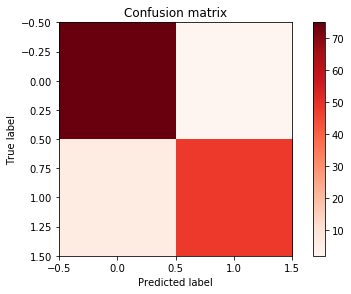

In [19]:
# Logistic
log_clf=LogisticRegression()
train_score(log_clf,x,y)

Training Data Accuracy: 0.95
Test Data Accuracy:     0.92
[[72  5]
 [ 6 48]]


Precision:              0.92
Recall:                 0.94
f1: 0.93


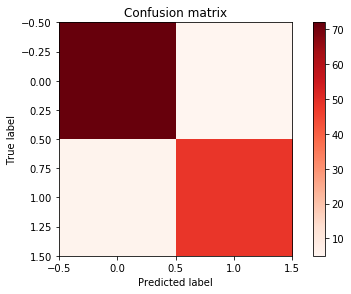

In [20]:
# KNN
knn4 = KNeighborsClassifier(n_neighbors=5)
train_score(knn4,x,y)

Training Data Accuracy: 0.93
Test Data Accuracy:     0.94
[[76  1]
 [ 7 47]]


Precision:              0.92
Recall:                 0.99
f1: 0.95


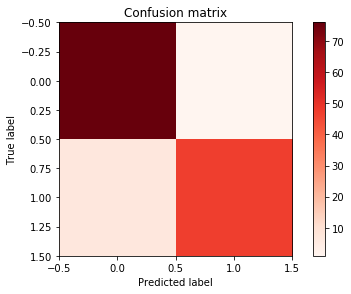

In [23]:
# Naives Bayes
nb = GaussianNB()
train_score(nb,x,y)

Training Data Accuracy: 0.96
Test Data Accuracy:     0.95
[[75  2]
 [ 4 50]]


Precision:              0.95
Recall:                 0.97
f1: 0.96


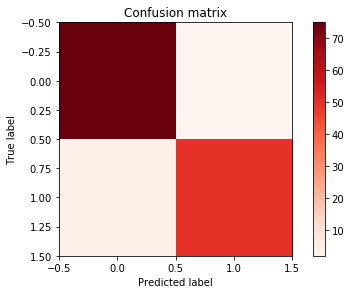

In [24]:
#Support vector machines
svm = SVC()
train_score(svm,x,y)

Training Data Accuracy: 1.00
Test Data Accuracy:     0.94
[[74  3]
 [ 5 49]]


Precision:              0.94
Recall:                 0.96
f1: 0.95


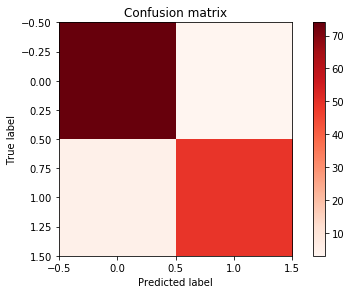

In [25]:
# Decision Trees
dtc = DecisionTreeClassifier()
train_score(dtc,x,y)

Training Data Accuracy: 1.00
Test Data Accuracy:     0.95
[[75  2]
 [ 5 49]]


Precision:              0.94
Recall:                 0.97
f1: 0.96


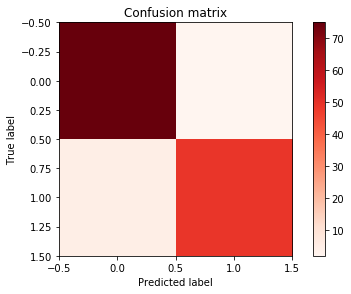

In [26]:
# Random forests
rfc = RandomForestClassifier()
train_score(rfc,x,y)

#### Challenge 2

For each, draw the ROC curve and calculate the AUC.

In [30]:
house_votes4 = house_votes3.replace(['democrat','republican'],[1,0])

In [31]:
y = house_votes4['Class_Name']
x = house_votes4.loc[:,'handicapped_infants':'export-administration-act-south-africa']

The area undert the curve is  0.987734487734


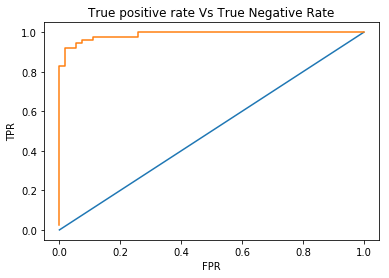

In [52]:
from sklearn.metrics import roc_curve, auc

xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(x, y, test_size=0.3, random_state=4444)
log = LogisticRegression()
log.fit(xtrain,np.ravel(ytrain))
y_score=log.predict_proba(xtest)[:,1]

fpr, tpr,_ = roc_curve(ytest, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('True positive rate Vs True Negative Rate')
print("The area under the curve is ",roc_auc)

In [34]:
ytest.unique()

array([1, 0])

#### Challenge 3

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the `cross_val_score` function (like in Challenge 9).

In [39]:
from sklearn.model_selection import cross_val_score

In [71]:
rfc = RandomForestClassifier()
logreg = LogisticRegression()
dtc = DecisionTreeClassifier()
svm = SVC()
nb = GaussianNB()

In [57]:
rfc2 = cross_val_score(rfc, x, y, cv=10, scoring='recall').mean()
print("The recall for Random Forest is ", rfc2)

The recall for Random Forest is  0.939601139601


In [85]:
metrics = ['recall', 'precision', 'f1', 'accuracy']
models = ['svm','rfc', 'logreg','dtc','nb']

In [90]:
for metric in metrics:
    
    value = cross_val_score(svm, x, y, cv=10, scoring= metric).mean()
    print("The {} for {} is {}".format(metric,"Support Vector",value))
    value = cross_val_score(rfc, x, y, cv=10, scoring= metric).mean()
    print("The {} for {} is {}".format(metric," Random Forest",value))
    value = cross_val_score(logreg, x, y, cv=10, scoring= metric).mean()
    print("The {} for {} is {}".format(metric,"Logistic ",value))
    value = cross_val_score(dtc, x, y, cv=10, scoring= metric).mean()
    print("The {} for {} is {}".format(metric,"Decision Tree",value))
    value = cross_val_score(nb, x, y, cv=10, scoring= metric).mean()
    print("The {} for {} is {}".format(metric," Naives Bayes",value))

The recall for Support Vector is 0.9545584045584047
The recall for  Random Forest is 0.9548433048433049
The recall for Logistic  is 0.9658119658119659
The recall for Decision Tree is 0.9396011396011396
The recall for  Naives Bayes is 0.9509971509971511
The precision for Support Vector is 0.9776921354507563
The precision for  Random Forest is 0.9858333333333335
The precision for Logistic  is 0.9668315018315019
The precision for Decision Tree is 0.9535426017150155
The precision for  Naives Bayes is 0.9512088964675172
The f1 for Support Vector is 0.9651834301473592
The f1 for  Random Forest is 0.9689553030745565
The f1 for Logistic  is 0.9657463704976994
The f1 for Decision Tree is 0.9470196058741536
The f1 for  Naives Bayes is 0.9505738943097434
The accuracy for Support Vector is 0.9582804792107119
The accuracy for  Random Forest is 0.9514094432699084
The accuracy for Logistic  is 0.9582276250880902
The accuracy for Decision Tree is 0.9353971609785564
The accuracy for  Naives Bayes is 0.

#### Challenge 4

For your movie classifiers, calculate the precision and recall for each class.

In [40]:
path = '/Users/pradnyanimkar/ds/metis/metisgh/sf17_ds8/challenges/challenges_data/2013_movies.csv'

In [41]:
movie_data = pd.read_csv(path,sep = ',')

In [105]:
movie_data2 = movie_data.replace(['PG-13', 'PG', 'G', 'R'],['3','2','1','0'])

In [106]:
movie_data2.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate'],
      dtype='object')

In [107]:
mean_v = movie_data2['Budget'].mean()
movie_data2['Budget'].fillna(mean_v, inplace = True)

In [108]:
y4 = movie_data2['Rating']
#X4 = movie_data.loc[:,['Budget', 'DomesticTotalGross','Runtime', 'ReleaseDate2']]
X4 = movie_data2.loc[:,['Budget', 'DomesticTotalGross','Runtime']]

In [125]:
X_train4, X_test4, y_train4, y_test4  = train_test_split( X4, y4 , test_size=0.2, random_state = 42)

In [126]:
y4.unique()

array(['3', '2', '1', '0'], dtype=object)

In [128]:
y_train4.shape

(80,)

In [136]:
log_clf=LogisticRegression()
#train_score(log_clf,X4,y4)
y_pred_train10 =log_clf.fit( X_train4, y_train4)

In [139]:
y_pred_test = log_clf.predict(X_test4)

In [140]:
from sklearn.metrics import classification_report

In [141]:
print(classification_report(y_test4, y_pred_test))

             precision    recall  f1-score   support

          0       1.00      0.33      0.50         6
          2       0.00      0.00      0.00         1
          3       0.72      1.00      0.84        13

avg / total       0.77      0.75      0.70        20



/Users/pradnyanimkar/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [121]:
y_test4.shape

(20,)

In [124]:
y_pred_test10.shape

(80,)

### Challenge 5

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [91]:
path2 = '/Users/pradnyanimkar/ds/metis/metisgh/sf17_ds8_mycopy/Challenge8/haberman.data'

In [92]:
col_names = ['Age', 'year_ops', 'num_nodes', 'status']

In [93]:
haberman = pd.read_table(path2, header = None, names = col_names, sep =',')

In [101]:
haberman = haberman.replace([2,1],[1,0])

In [102]:
y6 = haberman['status']
X6 = haberman.loc[:,'Age':'num_nodes']

The area undert the curve is  0.650525525526


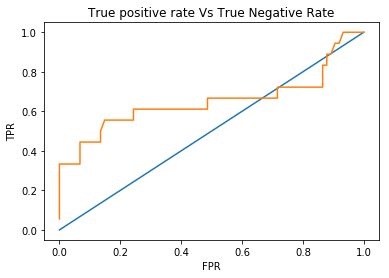

In [104]:
from sklearn.metrics import roc_curve, auc

xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(X6, y6, test_size=0.3, random_state=4444)
log = LogisticRegression()
log.fit(xtrain,np.ravel(ytrain))
y_score=log.predict_proba(xtest)[:,1]

fpr, tpr,_ = roc_curve(ytest, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('True positive rate Vs True Negative Rate')
print("The area undert the curve is ",roc_auc)